In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")


In [3]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree

import graphviz
import pandas as pd
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees
from sklearn import tree

# Classifier

In [4]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"
tree_classifier = DecisionTreeClassifier(max_depth=4, random_state=random_state)
tree_classifier.fit(dataset[features], dataset[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [5]:
from sklearn import tree as sklearn_tree

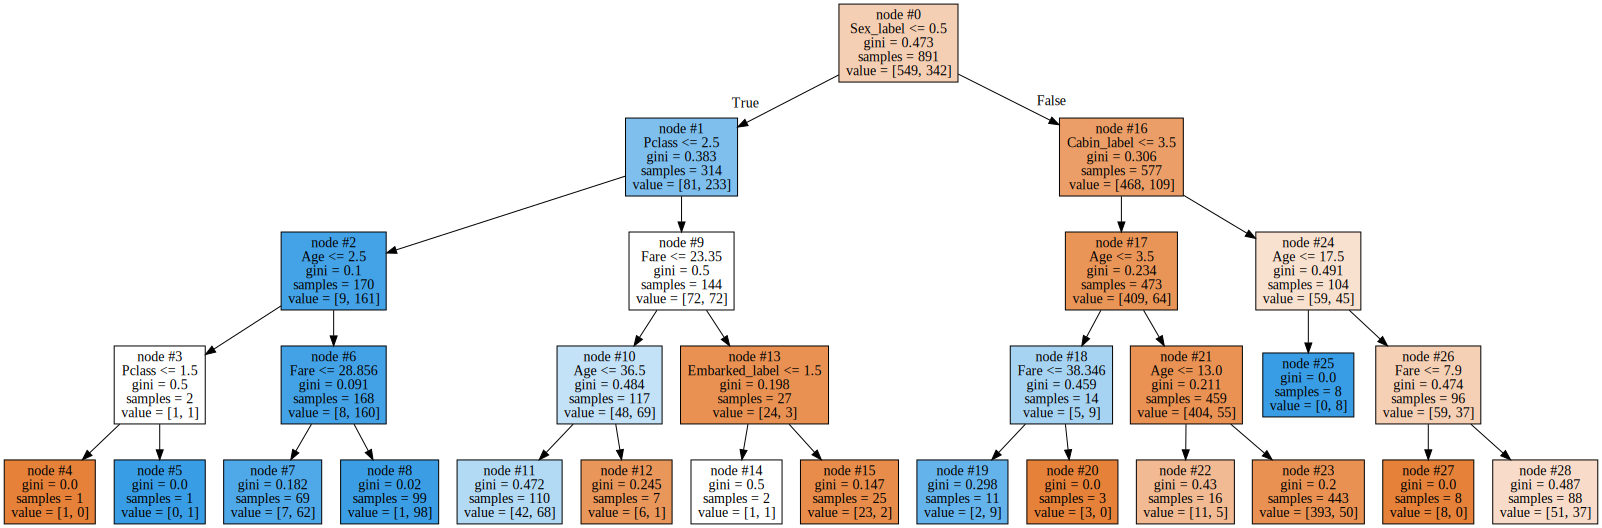

In [6]:
dot_data = sklearn_tree.export_graphviz(tree_classifier, out_file=None, feature_names=features,
                                                filled=True,node_ids=True)
graphviz.Source(dot_data)

In [7]:
tree_classifier.tree_.children_left

array([ 1,  2,  3,  4, -1, -1,  7, -1, -1, 10, 11, -1, -1, 14, -1, -1, 17,
       18, 19, -1, -1, 22, -1, -1, 25, -1, 27, -1, -1])

## Initialize shadow tree

In [8]:
sk_dtree = ShadowSKDTree(tree_classifier, dataset[features], dataset[target], features, target, [0, 1])

## Visualizations

### viz_leaf_samples

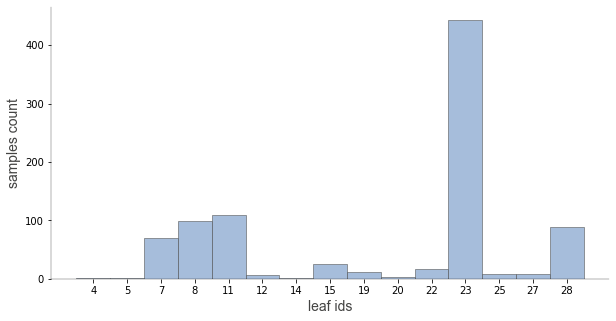

In [9]:
trees.viz_leaf_samples(tree_classifier, dataset[features], features)

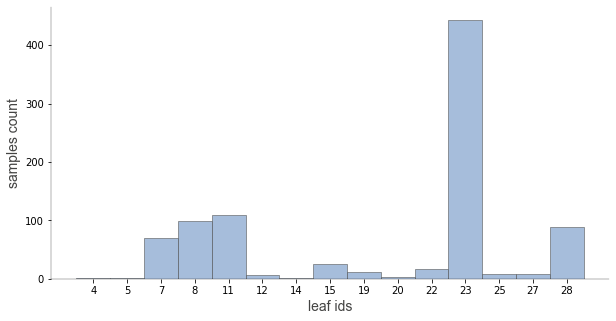

In [10]:
trees.viz_leaf_samples(sk_dtree)

### ctreeviz_leaf_samples

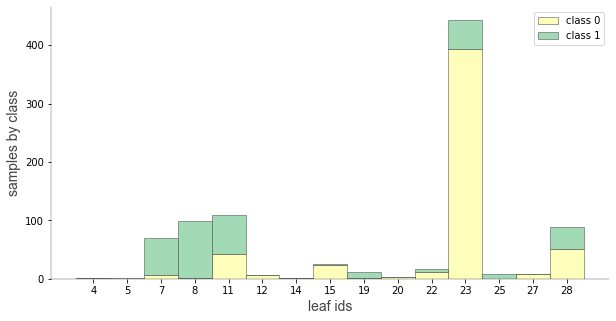

In [11]:
trees.ctreeviz_leaf_samples(tree_classifier, dataset[features], dataset[target], features)

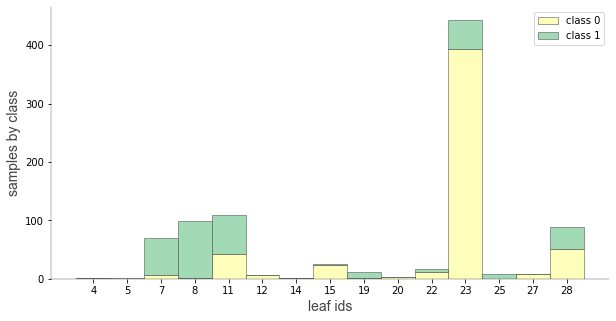

In [12]:
trees.ctreeviz_leaf_samples(sk_dtree)

### dtreeviz

class_values [0 1]
color_map {0: '#FEFEBB', 1: '#a1dab4'}
node split 1.5
node split 28.856249809265137
node split 2.5
node split 36.5
node split 1.5
node split 23.350000381469727
node split 2.5
node split 38.34584999084473
node split 13.0
node split 3.5
node split 7.900000095367432
node split 17.5
node split 3.5
node split 0.5


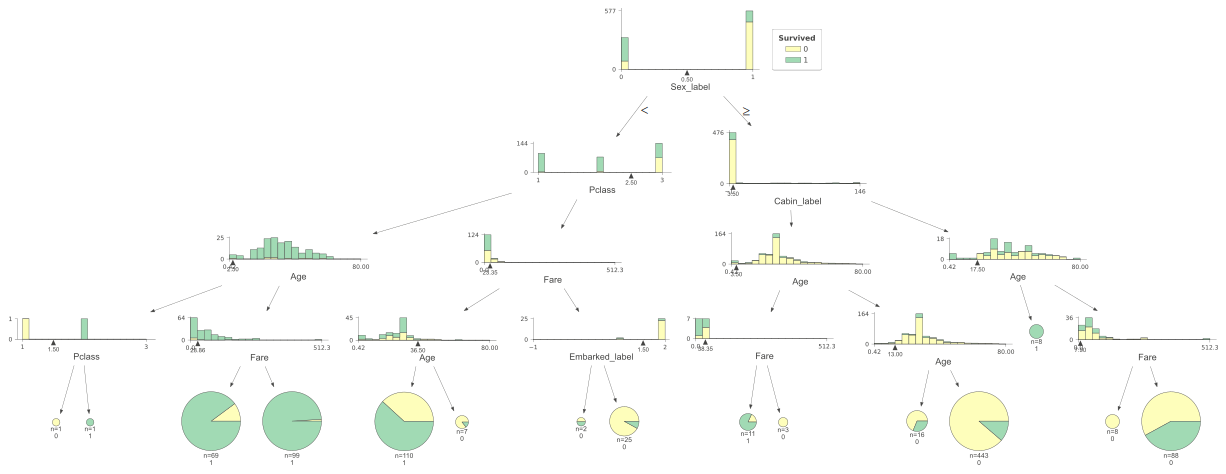

In [13]:
trees.dtreeviz(tree_classifier, dataset[features], dataset[target], features, target, class_names=[0, 1])

class_values [0 1]
color_map {0: '#FEFEBB', 1: '#a1dab4'}


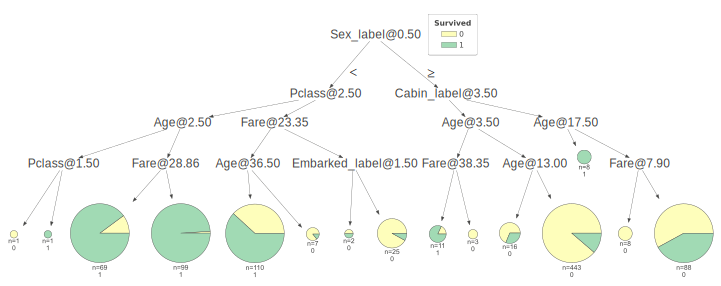

In [15]:
trees.dtreeviz(sk_dtree, fancy=False)

#### balanced trained model

In [15]:
tree_classifier_balanced = DecisionTreeClassifier(max_depth=3, random_state=random_state, class_weight="balanced")
tree_classifier_balanced.fit(dataset[features], dataset[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [16]:
sk_dtree_balanced = ShadowSKDTree(tree_classifier_balanced, dataset[features], dataset[target], features, target, class_names=[0,1])

In [17]:
dataset[target].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
dataset.query("Sex_label <= 0.5")[target].value_counts()

1    233
0     81
Name: Survived, dtype: int64

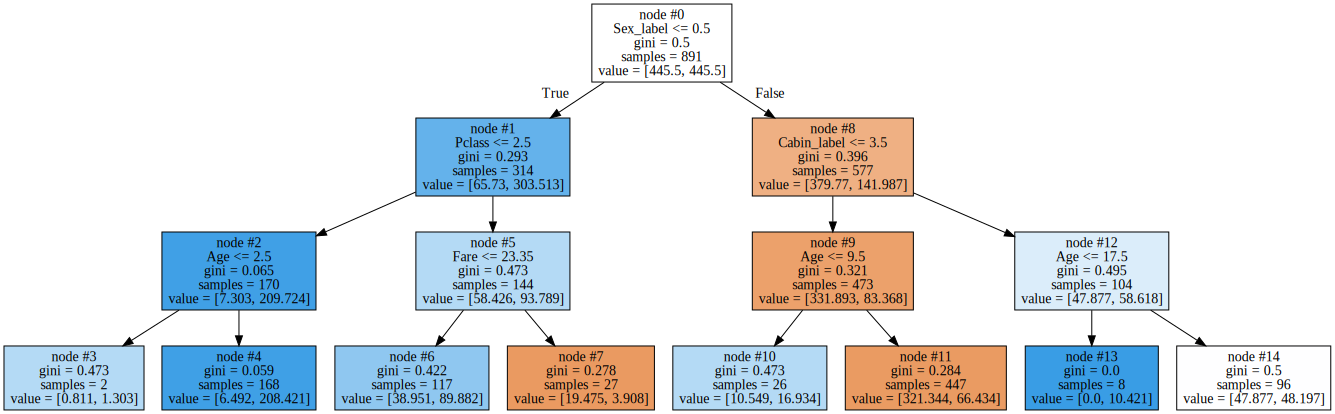

In [19]:
dot_data = tree.export_graphviz(tree_classifier_balanced, out_file=None, feature_names=features,
                                                filled=True, node_ids=True)
graphviz.Source(dot_data)

In [20]:
sk_dtree_balanced.get_class_weights()

array([0.81147541, 1.30263158])

In [21]:
sk_dtree_balanced.get_prediction_value(4) / sk_dtree_balanced.get_class_weights()

array([  8., 160.])

#### show just path

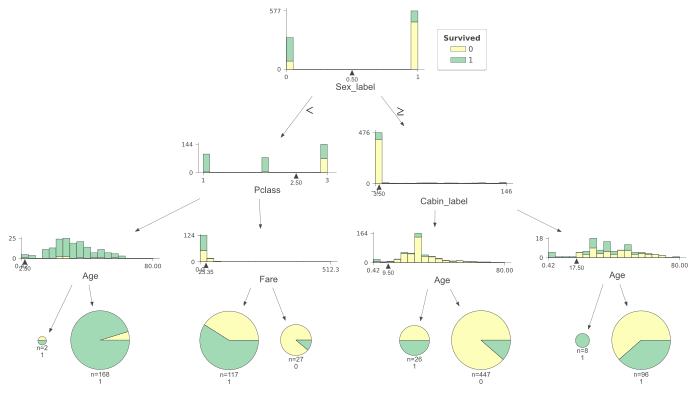

In [22]:
trees.dtreeviz(sk_dtree_balanced)

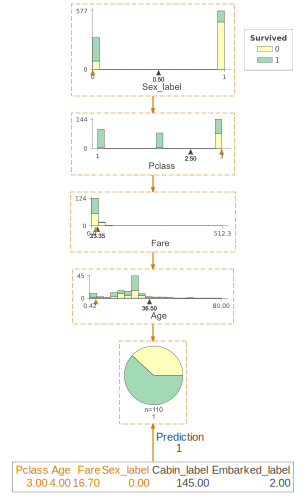

In [23]:
trees.dtreeviz(sk_dtree, show_just_path=True, X = dataset[features].iloc[10])

### viz_leaf_criterion

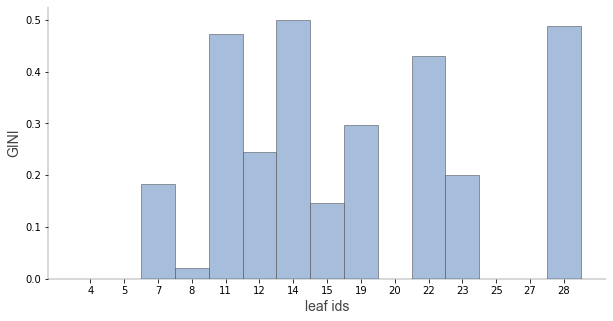

In [24]:
trees.viz_leaf_criterion(tree_classifier)

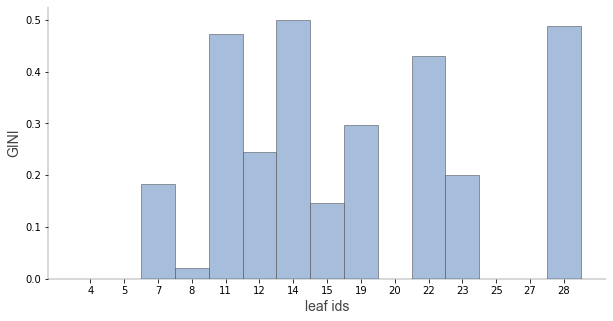

In [25]:
trees.viz_leaf_criterion(sk_dtree)

### describe_node_sample

In [26]:
trees.describe_node_sample(tree_classifier, node_id=1, x_data=dataset[features], feature_names=features)


Pclass         Age        Fare  Sex_label  Cabin_label  \
count  314.000000  314.000000  314.000000      314.0   314.000000   
mean     2.159236   28.216730   44.479818        0.0    23.745223   
std      0.857290   12.877543   57.997698        0.0    43.225526   
min      1.000000    0.750000    6.750000        0.0    -1.000000   
25%      1.000000   21.000000   12.071875        0.0    -1.000000   
50%      2.000000   29.699118   23.000000        0.0    -1.000000   
75%      3.000000   35.000000   55.000000        0.0    35.750000   
max      3.000000   63.000000  512.329200        0.0   145.000000   

       Embarked_label  
count      314.000000  
mean         1.401274  
std          0.863605  
min         -1.000000  
25%          1.000000  
50%          2.000000  
75%          2.000000  
max          2.000000

In [27]:
trees.describe_node_sample(sk_dtree, node_id=10)

Pclass         Age        Fare  Sex_label  Cabin_label  Embarked_label
count   117.0  117.000000  117.000000      117.0   117.000000      117.000000
mean      3.0   23.976667   11.722829        0.0     6.196581        1.341880
std       0.0   10.534377    4.695136        0.0    31.167855        0.789614
min       3.0    0.750000    6.750000        0.0    -1.000000        0.000000
25%       3.0   18.000000    7.775000        0.0    -1.000000        1.000000
50%       3.0   27.000000    9.587500        0.0    -1.000000        2.000000
75%       3.0   29.699118   15.500000        0.0    -1.000000        2.000000
max       3.0   63.000000   23.250000        0.0   145.000000        2.000000

### explain_prediction_path

In [28]:
X = dataset[features].iloc[10]
X

Pclass              3.0
Age                 4.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

In [26]:
trees.explain_prediction_path(tree_classifier, X, feature_names=features, explanation_type="plain_english")

2.5 <= Pclass 
Age < 36.5
10.82 <= Fare  < 23.35
Sex_label < 0.5
1.5 <= Embarked_label 


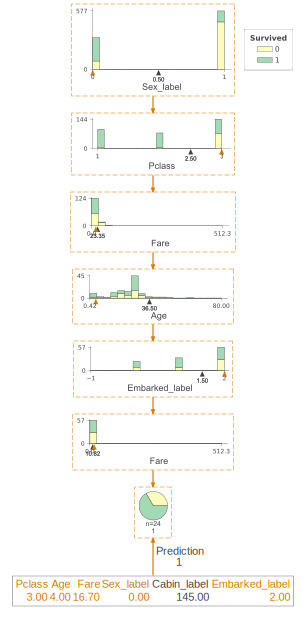

In [27]:
trees.dtreeviz(sk_dtree, show_just_path=True, X=X)

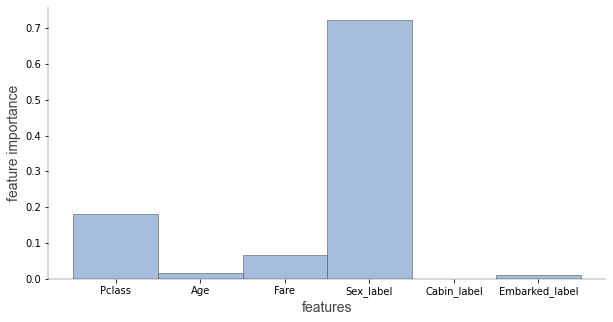

In [28]:
trees.explain_prediction_path(tree_classifier, X, feature_names=features, explanation_type="sklearn_default")

In [29]:
trees.explain_prediction_path(sk_dtree, X, explanation_type="plain_english")

2.5 <= Pclass 
Age < 36.5
10.82 <= Fare  < 23.35
Sex_label < 0.5
1.5 <= Embarked_label 


# Regressor

In [30]:
features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target_reg = "Age"
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
tree_regressor.fit(dataset[features_reg], dataset[target_reg])


DecisionTreeRegressor(criterion='mae', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [31]:
sk_dtree_reg = ShadowSKDTree(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

## Visualizations

### dtreeviz

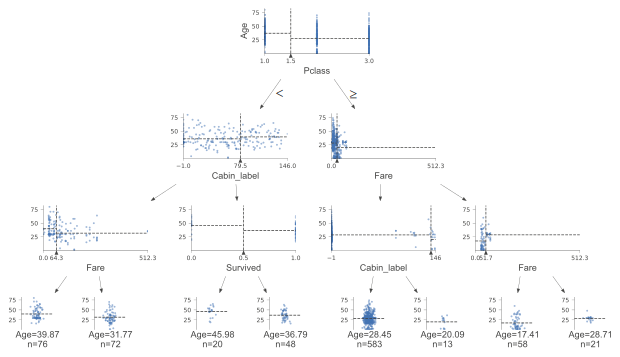

In [32]:
trees.dtreeviz(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

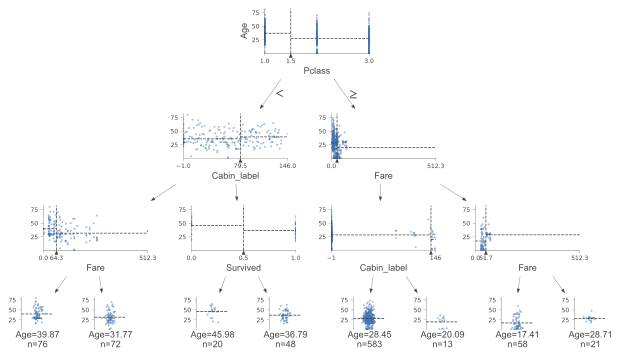

In [33]:
trees.dtreeviz(sk_dtree_reg)

#### Median vs mean
- it seams that sklearn regressor tree is using median for leaf prediction.

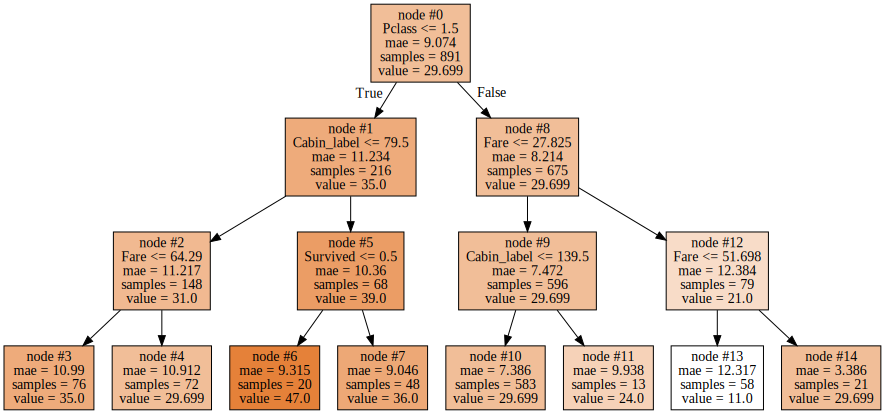

In [34]:
dot_data = tree.export_graphviz(tree_regressor, out_file=None, feature_names=features_reg,
                                                filled=True, node_ids=True)
graphviz.Source(dot_data)

In [35]:
[leaf.id for leaf in sk_dtree_reg.leaves]

[3, 4, 6, 7, 10, 11, 13, 14]

In [36]:
leaf_index = 0 # node number 3
print(dataset[target_reg][sk_dtree_reg.leaves[leaf_index].samples()].median())
print(dataset[target_reg][sk_dtree_reg.leaves[leaf_index].samples()].mean())

35.0
39.86556888544891


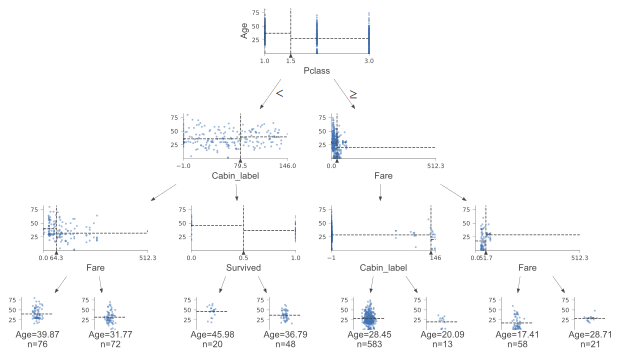

In [37]:
trees.dtreeviz(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

In [38]:
# get data samples from leaf 3
sk_dtree_reg.get_node_samples()[3] 

[3,
 11,
 23,
 30,
 35,
 54,
 55,
 64,
 83,
 96,
 110,
 137,
 155,
 168,
 170,
 174,
 177,
 185,
 187,
 194,
 209,
 263,
 270,
 273,
 284,
 295,
 298,
 329,
 331,
 351,
 383,
 430,
 447,
 449,
 452,
 467,
 475,
 487,
 492,
 493,
 507,
 513,
 523,
 536,
 539,
 545,
 555,
 556,
 571,
 583,
 599,
 602,
 604,
 607,
 630,
 632,
 633,
 647,
 669,
 671,
 690,
 694,
 711,
 712,
 766,
 781,
 793,
 806,
 815,
 822,
 839,
 842,
 867,
 872,
 887,
 889]

In [39]:
x = dataset[features].iloc[3]
x

Pclass             1.0
Age               35.0
Fare              53.1
Sex_label          0.0
Cabin_label       55.0
Embarked_label     2.0
Name: 3, dtype: float64

In [40]:
tree_regressor.predict([x])

array([35.])

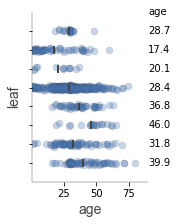

In [41]:
trees.viz_leaf_target(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

#### show just path

In [42]:
x = dataset[features_reg].iloc[10]
x

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

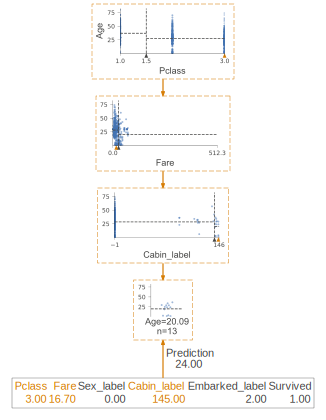

In [43]:
trees.dtreeviz(sk_dtree_reg, show_just_path=True, X = x)

### viz_leaf_samples

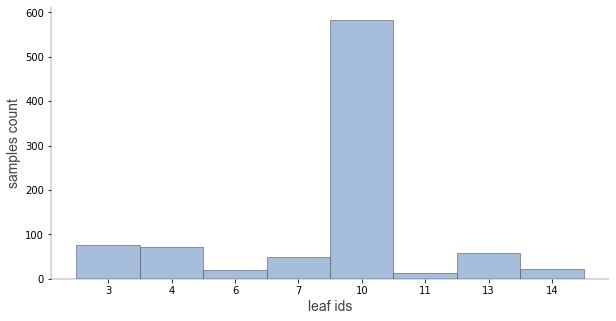

In [44]:
trees.viz_leaf_samples(tree_regressor, dataset[features_reg], features_reg)

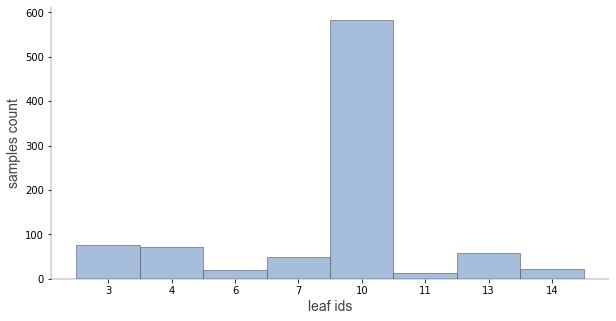

In [45]:
trees.viz_leaf_samples(sk_dtree_reg)

### viz_leaf_criterion

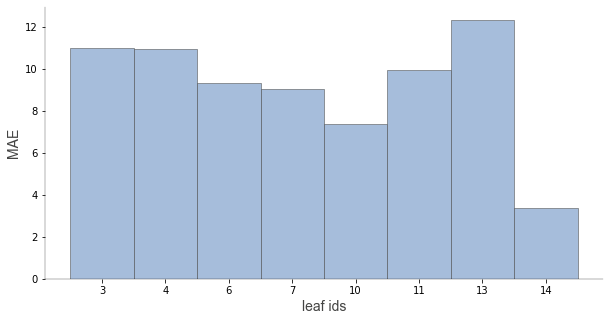

In [46]:
trees.viz_leaf_criterion(tree_regressor)

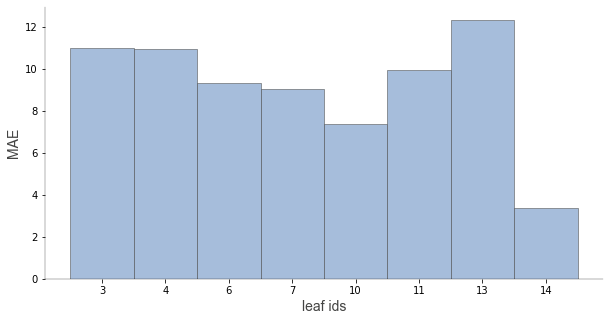

In [47]:
trees.viz_leaf_criterion(sk_dtree_reg)

### viz_leaf_target

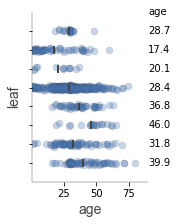

In [48]:
trees.viz_leaf_target(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

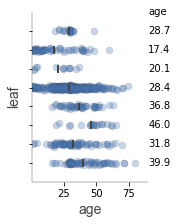

In [49]:
trees.viz_leaf_target(sk_dtree_reg)

### describe_node_sample

In [50]:
trees.describe_node_sample(tree_regressor, node_id=1, x_data=dataset[features], feature_names=features_reg)

Pclass        Fare   Sex_label  Cabin_label  Embarked_label    Survived
count   216.0  216.000000  216.000000   216.000000      216.000000  216.000000
mean      1.0   37.048118   84.154687     0.564815       54.773148    1.175926
std       0.0   14.046369   78.380373     0.496933       43.781906    0.996073
min       1.0    0.920000    0.000000     0.000000       -1.000000   -1.000000
25%       1.0   29.000000   30.923950     0.000000       13.750000    0.000000
50%       1.0   35.000000   60.287500     1.000000       53.500000    2.000000
75%       1.0   47.250000   93.500000     1.000000       91.250000    2.000000
max       1.0   80.000000  512.329200     1.000000      146.000000    2.000000

In [51]:
trees.describe_node_sample(sk_dtree_reg, node_id=1)

Pclass        Fare   Sex_label  Cabin_label  Embarked_label    Survived
count   216.0  216.000000  216.000000   216.000000      216.000000  216.000000
mean      1.0   84.154687    0.564815    54.773148        1.175926    0.629630
std       0.0   78.380373    0.496933    43.781906        0.996073    0.484026
min       1.0    0.000000    0.000000    -1.000000       -1.000000    0.000000
25%       1.0   30.923950    0.000000    13.750000        0.000000    0.000000
50%       1.0   60.287500    1.000000    53.500000        2.000000    1.000000
75%       1.0   93.500000    1.000000    91.250000        2.000000    1.000000
max       1.0  512.329200    1.000000   146.000000        2.000000    1.000000

### explain_prediction_path

In [52]:
X_reg = dataset[features_reg].iloc[10]
X_reg

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

In [53]:
trees.explain_prediction_path(tree_regressor, X_reg, feature_names=features_reg, explanation_type="plain_english")

1.5 <= Pclass 
Fare < 27.82
139.5 <= Cabin_label 


In [54]:
trees.explain_prediction_path(sk_dtree_reg, X_reg, "plain_english")

1.5 <= Pclass 
Fare < 27.82
139.5 <= Cabin_label 


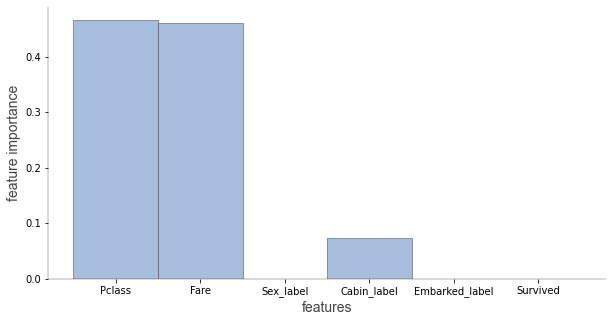

In [55]:
trees.explain_prediction_path(tree_regressor, X_reg, feature_names=features_reg, explanation_type="sklearn_default")

In [56]:
trees.explain_prediction_path(sk_dtree_reg, X_reg, "sklearn_default")

1.5 <= Pclass 
Fare < 27.82
139.5 <= Cabin_label 


### rtreeviz_univar

In [57]:
features_reg_univar = ["Pclass"]
target_reg = "Age"
dtr_univar = DecisionTreeRegressor(max_depth=2, random_state=random_state, criterion="mae")
dtr_univar.fit(dataset[features_reg_univar], dataset[target_reg])


DecisionTreeRegressor(criterion='mae', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [58]:
skdtree_univar = ShadowSKDTree(dtr_univar, dataset[features_reg_univar], dataset[target_reg], features_reg_univar, target_reg)

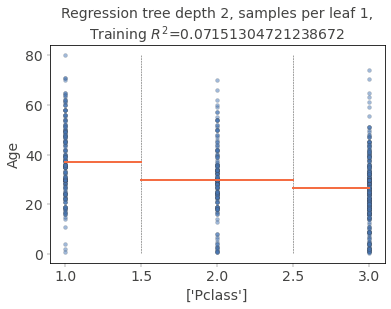

In [59]:
trees.rtreeviz_univar(dtr_univar, dataset[features_reg_univar], dataset[target_reg], features_reg_univar, target_reg)


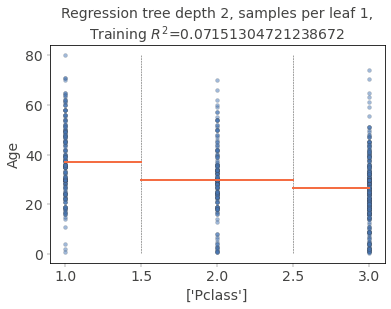

In [60]:
trees.rtreeviz_univar(skdtree_univar)

### rtreeviz_bivar_3D

In [61]:
features_reg_bivar = ["Age", "Fare"]
target_reg = "Pclass"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(criterion='mae', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [62]:
skdtree_bivar = ShadowSKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

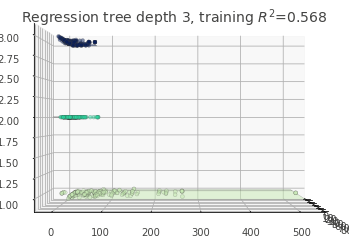

In [63]:
trees.rtreeviz_bivar_3D(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)


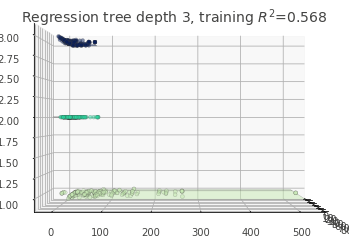

In [64]:
trees.rtreeviz_bivar_3D(skdtree_bivar)

### rtreeviz_bivar_heatmap

In [65]:
features_reg_bivar = ["Pclass", "Fare"]
target_reg = "Age"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(criterion='mae', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [66]:
skdtree_bivar = ShadowSKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

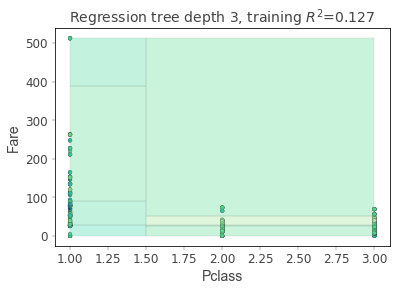

In [67]:
trees.rtreeviz_bivar_heatmap(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

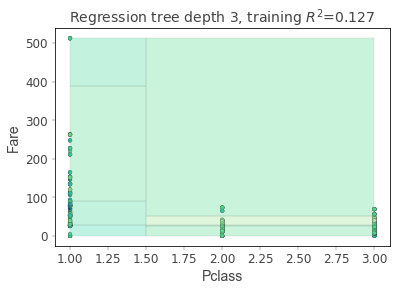

In [68]:
trees.rtreeviz_bivar_heatmap(skdtree_bivar)